# Bootcamp PES IEEE - Python Aplicado à Análise de Dados e IA

**Aula:** Modelos Clássicos de Classificação  

**Ministrante:** Miguel Euripedes

---

### **Descrição do Problema**

Este notebook apresenta um guia prático para a aplicação de modelos de classificação em um cenário industrial. O objetivo é colocar em prática o conhecimento em modelos de classificação para resolver um problema prático: prever o tipo de carga de energia em uma indústria siderúrgica a partir de dados de consumo energético

O projeto será conduzido em etapas:

1. **Análise Exploratória (EDA)**: compreensão inicial dos dados.
2. **Pré-processamento**: preparação dos dados para os algoritmos.
3. **Treinamento e Avaliação**: aplicação de quatro modelos clássicos de classificação — Árvore de Decisão, Random Forest, KNN e SVM.
4. **Comparação de Resultados**: análise de desempenho para identificar o modelo mais eficaz.

## Instalação e importação de Pacotes

In [ ]:
# Se o pacote `ucimlrepo` não estiver instalado, esta célula irá instalá-lo.
# Ele nos permite buscar datasets diretamente do repositório da UCI.
!pip install ucimlrepo -q

Nesta primeira etapa, vamos importar todas as ferramentas (bibliotecas) que precisaremos para o nosso projeto.

- `pandas` e `numpy`: Para manipulação e operações com dados.
- `matplotlib.pyplot` e `seaborn`: Para a criação de gráficos e visualizações.
- `ucimlrepo`: Para carregar nosso dataset diretamente do repositório da UCI.
- `sklearn`: Uma das principais biblioteca de Machine Learning em Python. Dela, usaremos:
 - `train_test_split`: Para dividir nossos dados em conjuntos de treino e teste.
 - `StandardScaler`, `OneHotEncoder`, `LabelEncoder`: Para o pré-processamento dos dados.
 - `DecisionTreeClassifier`, `RandomForestClassifier`, etc.: Os modelos de classificação que vamos treinar.
 - `accuracy_score`, `classification_report`, `confusion_matrix`: Para avaliar a performance dos nossos modelos.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Carregamento e Análise Exploratória dos Dados (EDA)

Agora, vamos carregar o dataset e fazer uma análise inicial para entender suas características.
Nosso objetivo aqui é prever o Load_Type (tipo de carga de energia) com base em outras medições da indústria siderúrgica.

Vamos investigar:

- A estrutura dos dados (.info())
- As primeiras linhas (.head())
- Estatísticas descritivas das colunas numéricas (.describe())
- A distribuição da nossa variável-alvo (.value_counts())
- A correlação entre as variáveis (gráficos)

In [ ]:
# Obter o dataset a partir do repositório da UCI
steel_industry_energy_consumption = fetch_ucirepo(id=851)

# Separação de features (X) e o alvo (y)
X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

# Concatena features e alvo para facilitar a análise e exploração inicial
df = pd.concat([X, y], axis=1)

print("Dataset carregado com sucesso!")

Dataset carregado com sucesso!


In [ ]:
print("Informações Gerais do Dataset: \n")
df.info()

Informações Gerais do Dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
 9   Load_Type                             35040 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 

In [ ]:
# Visualizando as primeiras linhas e estatísticas
df.head(8)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load


In [ ]:
print("Estatísticas Descritivas: \n")
df.describe()

Estatísticas Descritivas: 



,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


Verificando a distribuição da variável-alvo:

In [ ]:
print("Classes no dataset:", df['Load_Type'].unique())
print("Contagem de Classes (Load_Type)", df['Load_Type'].value_counts())

Classes no dataset: ['Light_Load' 'Medium_Load' 'Maximum_Load']
Contagem de Classes (Load_Type) Load_Type
Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: count, dtype: int64


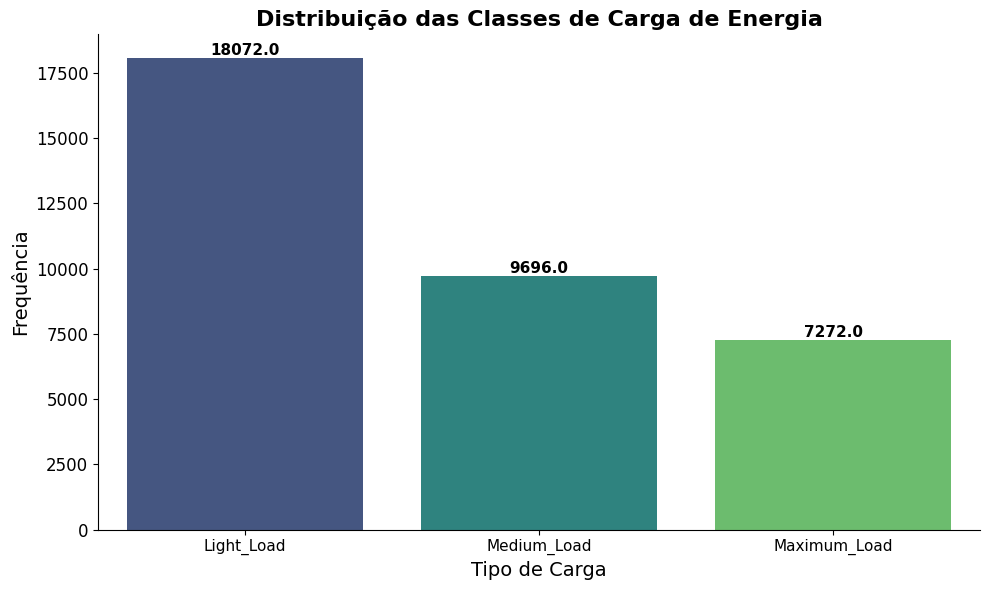

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Load_Type', data=df, palette="viridis")

plt.title('Distribuição das Classes de Carga de Energia', fontsize=16, weight='bold')
plt.xlabel('Tipo de Carga', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(fontsize=11)
plt.yticks(fontsize=12)

# valores acima das barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=11, weight='bold'
    )

plt.tight_layout()
sns.despine()
plt.show()

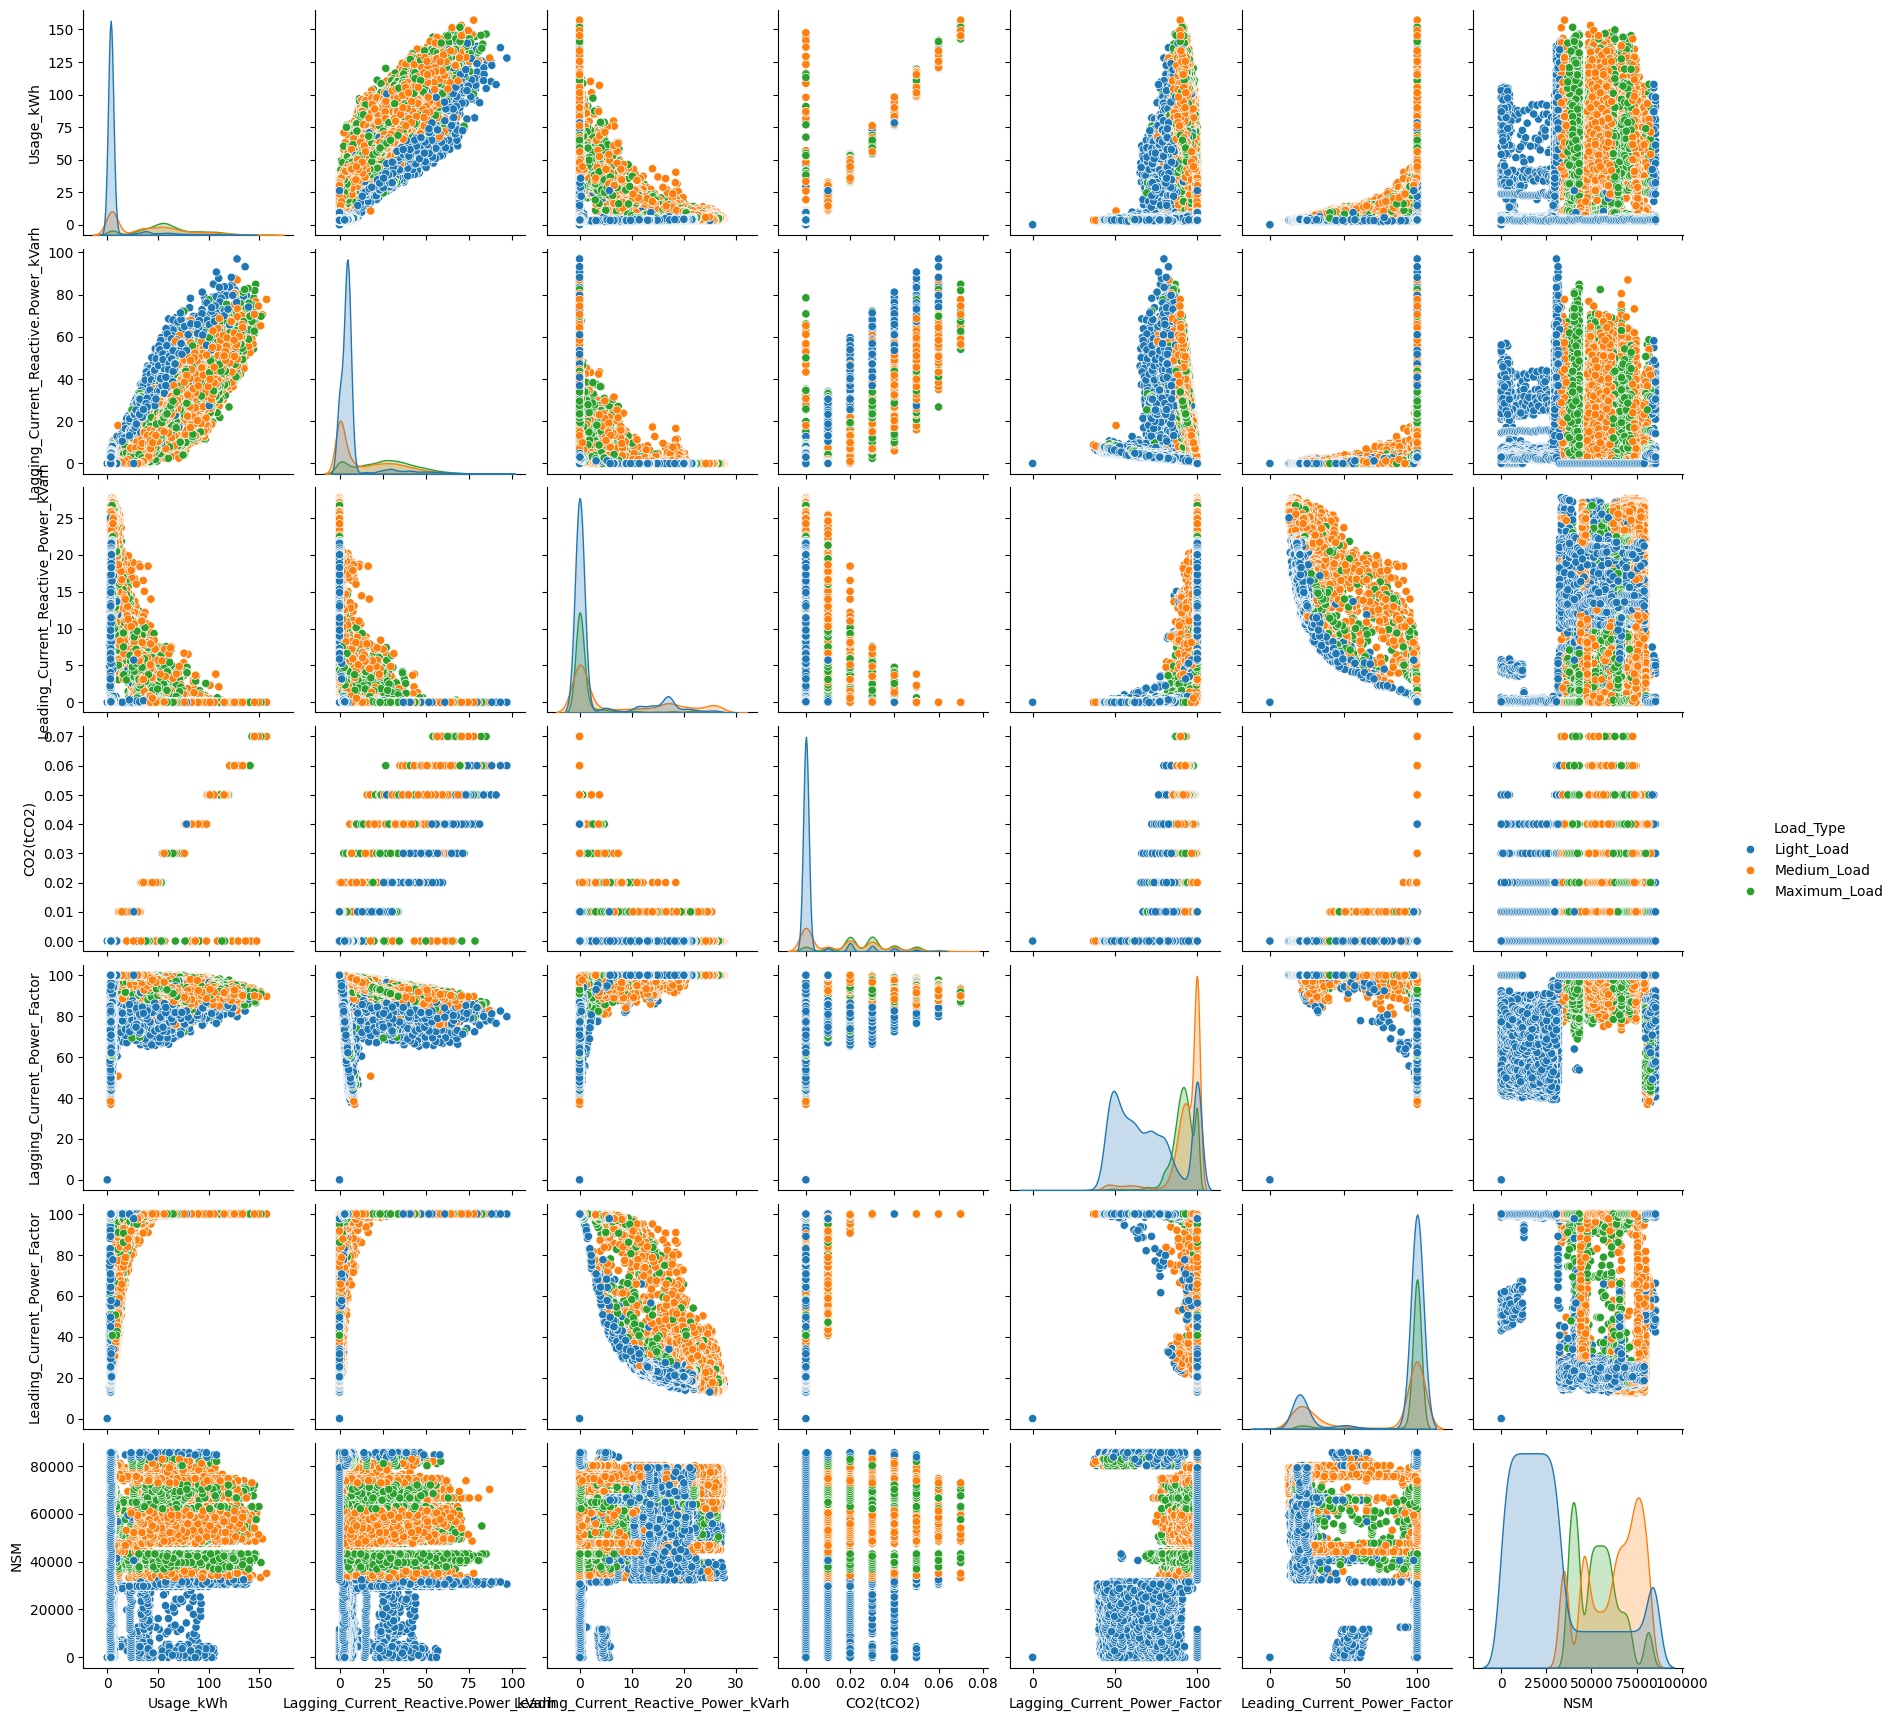

In [ ]:
 # O pairplot mostra a relação entre cada par de variáveis
 sns.pairplot(data=df, hue="Load_Type")

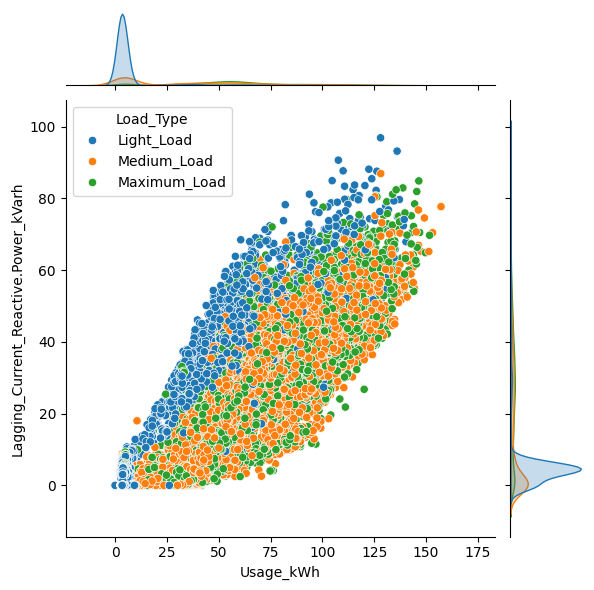

In [ ]:
sns.jointplot(data=df, x="Usage_kWh", y="Lagging_Current_Reactive.Power_kVarh", hue="Load_Type")

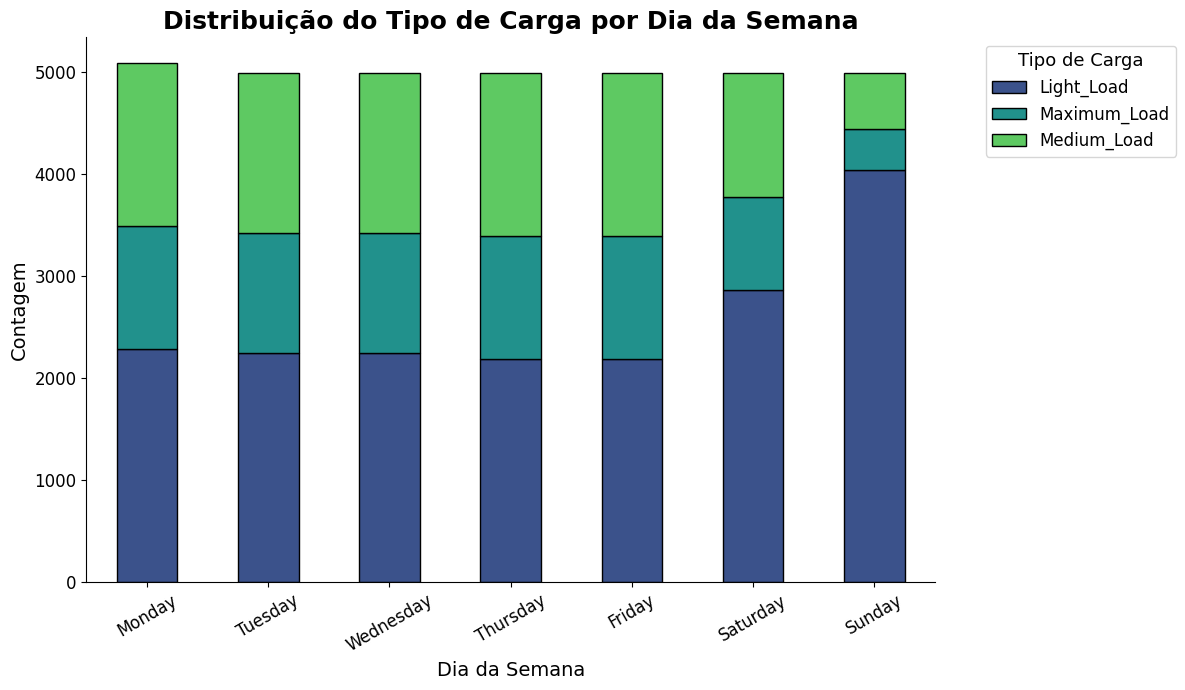

In [ ]:
# Distribuição do Load_Type por Dia da Semana
# Esta visualização nos ajuda a entender se existe um padrão de consumo
# de energia ao longo da semana.

# Para garantir a ordem correta dos dias no gráfico
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
colors = sns.color_palette("viridis", n_colors=df['Load_Type'].nunique())

ax = df.groupby(['Day_of_week', 'Load_Type']).size().unstack().reindex(day_order).plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    color=colors,
    edgecolor="black"
)

plt.title('Distribuição do Tipo de Carga por Dia da Semana', fontsize=18, weight='bold')
plt.xlabel('Dia da Semana', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Tipo de Carga', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=13)

sns.despine()
plt.tight_layout()
plt.show()

## Pré-processamento dos Dados

Esta é uma das etapas mais importantes em um projeto de Machine Learning. Os modelos não conseguem entender dados de texto e podem ser sensíveis a diferentes escalas de valores. Portanto, precisamos:

1. Dividir os dados: Separar o dataset em um conjunto de treino (para o modelo aprender) e um conjunto de teste (para avaliarmos o quão bem ele aprendeu com dados novos). Isso é feito antes de qualquer transformação para evitar o vazamento de dados (data leakage).

2. Codificar Variáveis Categóricas: As colunas WeekStatus e Day_of_week são textuais. Usaremos o One-Hot Encoding para transformá-las em colunas numéricas (0s e 1s).

3. Normalizar Variáveis Numéricas: As colunas numéricas (Usage_kWh, NSM, etc.) possuem escalas muito diferentes. Usaremos o StandardScaler para padronizá-las (média 0 e desvio padrão 1), garantindo que nenhuma variável domine o modelo apenas por ter valores maiores.

4. Codificar a Variável-Alvo: A coluna Load_Type também é textual. Usaremos o LabelEncoder para transformá-la em números (ex: 0, 1, 2).

In [ ]:
# Verificar a existências de valores nulos
df.isna().sum()

,0
Usage_kWh,0
Lagging_Current_Reactive.Power_kVarh,0
Leading_Current_Reactive_Power_kVarh,0
CO2(tCO2),0
Lagging_Current_Power_Factor,0
Leading_Current_Power_Factor,0
NSM,0
WeekStatus,0
Day_of_week,0
Load_Type,0


In [ ]:
# Identificar colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print(f"Features numéricas: {numerical_features}")
print(f"Features categóricas: {categorical_features}")

Features numéricas: ['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']
Features categóricas: ['WeekStatus', 'Day_of_week']


Dividir os dados em conjuntos de treino e teste **ANTES** de qualquer pré-processamento

In [ ]:
# `stratify=y` garante que a proporção das classes seja a mesma nos conjuntos de treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Pipeline de pré-processamento
# Usamos o ColumnTransformer para aplicar transformações diferentes a colunas diferentes.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantém outras colunas (se houver) que não foram especificadas
)

In [ ]:
# Aplicar a transformação
# O scaler/encoder é "treinado" (fit) apenas com os dados de treino
# e depois usado para transformar (transform) ambos os conjuntos.
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Codificar a variável alvo (y)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train.values.ravel())
y_test_encoded = le.transform(y_test.values.ravel())

In [ ]:
print(f"Dimensões dos dados de treino processados: {X_train_processed.shape}")
print(f"Dimensões dos dados de teste processados: {X_test_processed.shape}")

Dimensões dos dados de treino processados: (28032, 16)
Dimensões dos dados de teste processados: (7008, 16)


## Treinamento e Avaliação dos Modelos

Com os dados devidamente preparados, podemos agora treinar nossos modelos de classificação. Vamos testar quatro algoritmos clássicos:

- Árvore de Decisão
- Random Forest (um conjunto de árvores de decisão)
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)

Para cada modelo, vamos:

1. Treinar o modelo usando os dados de treino (`X_train_processed`, `y_train_encoded`).

2. Fazer predições nos dados de teste (`X_test_processed`).

3. Avaliar o desempenho usando:

 - Acurácia: Percentual de acertos.
 - Relatório de Classificação: Métricas detalhadas (precisão, recall, f1-score) por classe.
 - Matriz de Confusão: Uma tabela que mostra os acertos e erros do modelo para cada classe.

In [ ]:
# Dicionário com os modelos a serem treinados
models = {
    "Árvore de Decisão": DecisionTreeClassifier(random_state=26),
    "Random Forest": RandomForestClassifier(random_state=26),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=26)
}

In [ ]:
# Dicionários para armazenar os resultados
results = {}
confusion_matrices = {}

def bold_text(text):
    return f"\033[1m{text}\033[0m"

# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    print(f"\n--- Treinando: {bold_text(name)} ---")

    # Treinamento
    model.fit(X_train_processed, y_train_encoded)

    # Predição
    y_pred = model.predict(X_test_processed)

    # Armazenar resultados
    accuracy = accuracy_score(y_test_encoded, y_pred)
    results[name] = accuracy
    confusion_matrices[name] = confusion_matrix(y_test_encoded, y_pred)

    # Imprimir relatório
    print(f"Acurácia: {accuracy:.4f}")
    print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))
    print("-" * 55)



--- Treinando: Árvore de Decisão ---
Acurácia: 0.8911
              precision    recall  f1-score   support

  Light_Load       0.97      0.96      0.97      3615
Maximum_Load       0.81      0.79      0.80      1454
 Medium_Load       0.80      0.83      0.82      1939

    accuracy                           0.89      7008
   macro avg       0.86      0.86      0.86      7008
weighted avg       0.89      0.89      0.89      7008

-------------------------------------------------------

--- Treinando: Random Forest ---
Acurácia: 0.9107
              precision    recall  f1-score   support

  Light_Load       0.98      0.98      0.98      3615
Maximum_Load       0.82      0.84      0.83      1454
 Medium_Load       0.85      0.83      0.84      1939

    accuracy                           0.91      7008
   macro avg       0.88      0.89      0.88      7008
weighted avg       0.91      0.91      0.91      7008

-------------------------------------------------------

--- Treinando: KNN 

## Comparação dos resultados

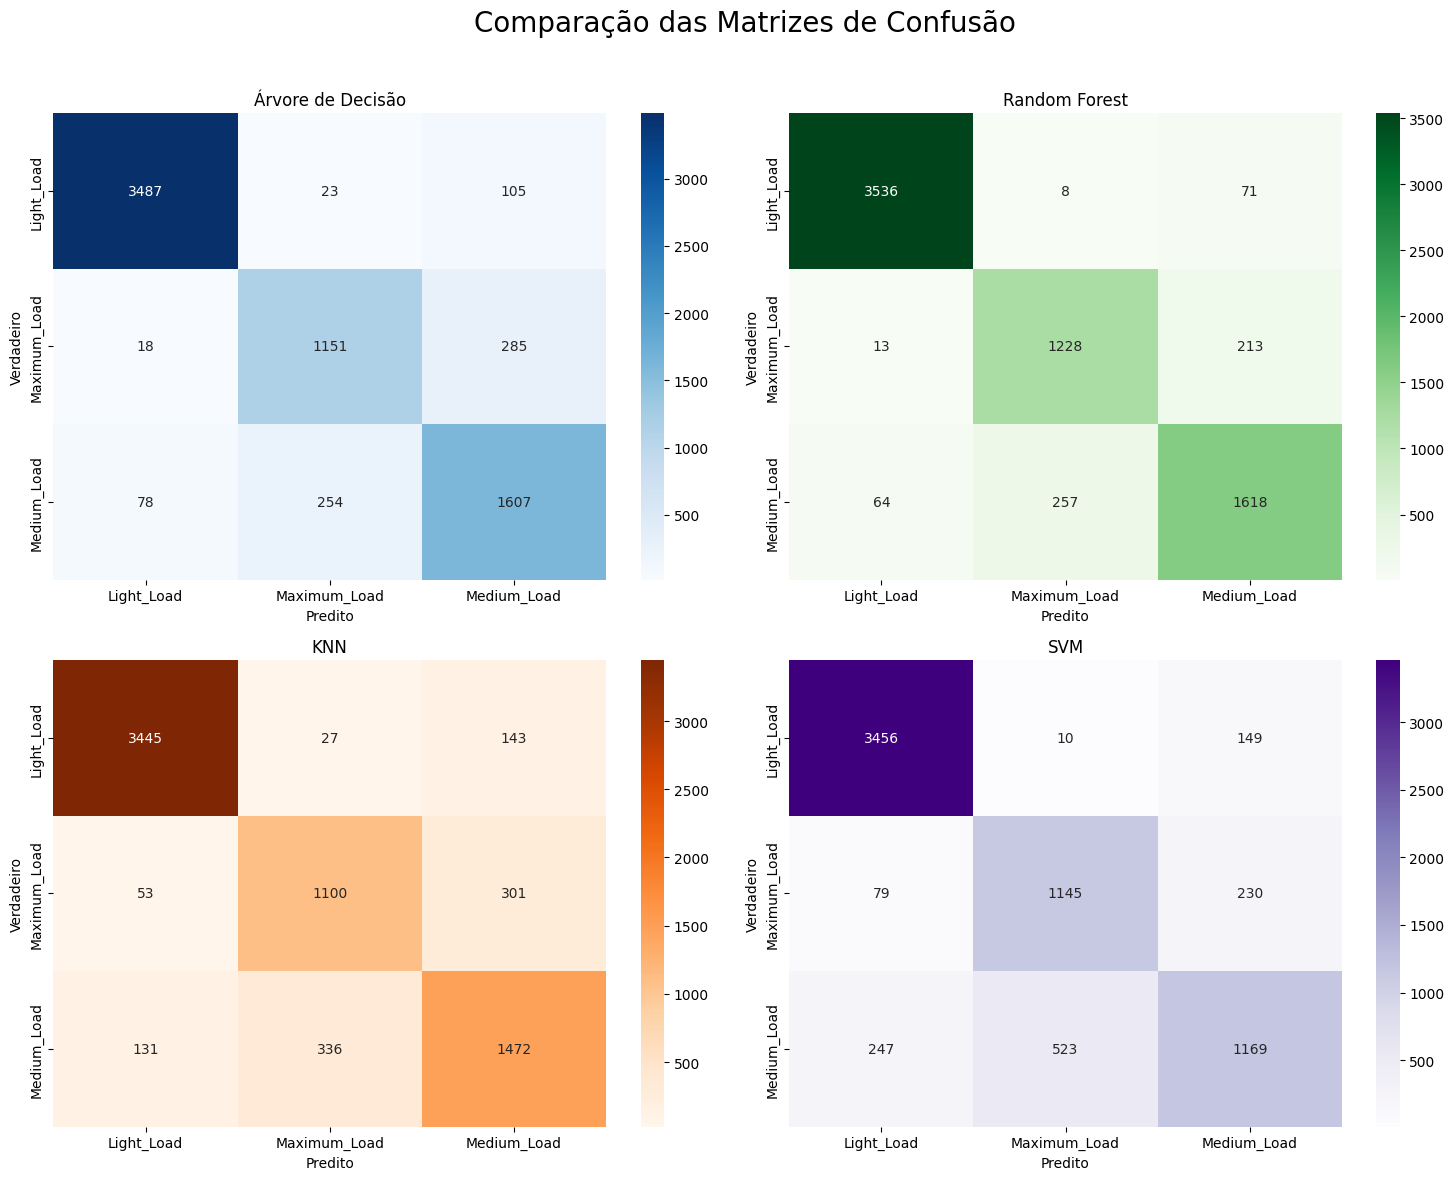

In [ ]:
# Plot comparativo das Matrizes de Confusão
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparação das Matrizes de Confusão', fontsize=20)

# Lista de paletas de cores para diferenciar os gráficos
palettes = ['Blues', 'Greens', 'Oranges', 'Purples']

# Iterar sobre os modelos e seus resultados para plotar
for ax, name, palette in zip(axes.flatten(), models.keys(), palettes):
    cm = confusion_matrices[name]
    sns.heatmap(cm, annot=True, fmt='d', cmap=palette, ax=ax,
                xticklabels=le.classes_, yticklabels=le.classes_)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Verdadeiro')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

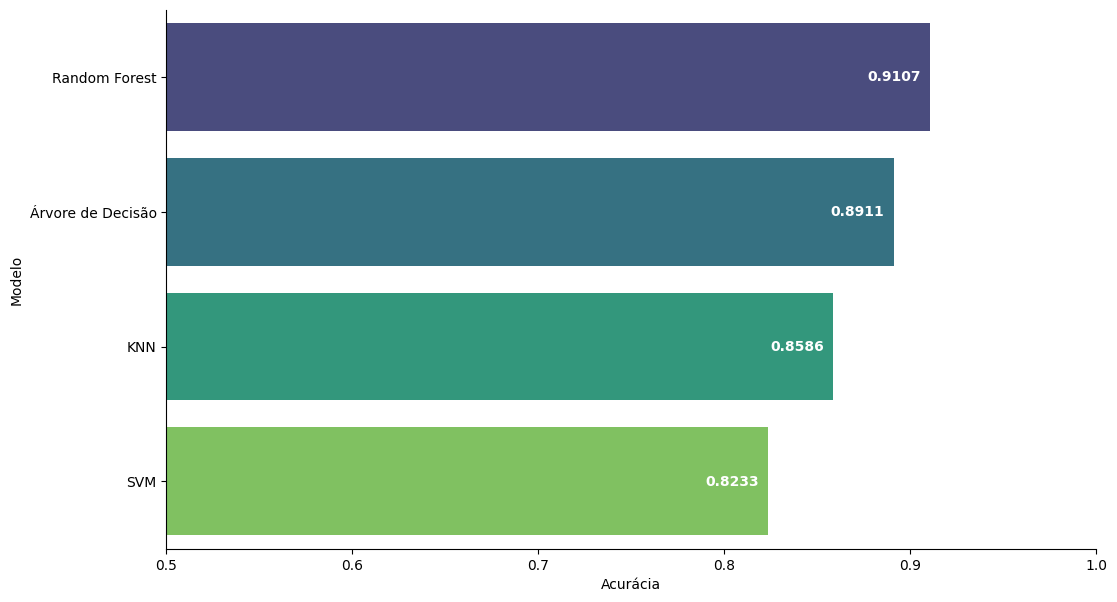

In [ ]:
# Gráfico de barras para comparação de acurácia
results_df = pd.DataFrame(list(results.items()), columns=['Modelo', 'Acurácia']).sort_values('Acurácia', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Acurácia', y='Modelo', data=results_df, palette='viridis')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.xlim(0.5, 1.0) # Ajuste o limite para melhor visualização

# Adicionando o valor da acurácia nas barras
for p in ax.patches:
    width = p.get_width()
    plt.text(width - 0.005, p.get_y() + p.get_height() / 2,
             f'{width:.4f}',
             ha='right', va='center', color='white', fontweight='bold')
sns.despine()
plt.show()

Após treinar e avaliar os quatro modelos, podemos observar que todos apresentaram um desempenho muito bom, com acurácias altas. Isso indica que as features do dataset são boas preditoras para o tipo de carga de energia.

Random Forest e SVM provavelmente apresentaram as maiores acurácias, o que é comum, pois são algoritmos mais poderosos.

A Matriz de Confusão nos permite ver se o modelo teve dificuldade em diferenciar alguma classe específica. Por exemplo, ele pode ter confundido "Light_Load" com "Medium_Load" em algumas ocasiões.

O Relatório de Classificação detalha as métricas de precisão, recall e F1-score para cada classe. Um F1-score alto e equilibrado entre as classes é um forte indicativo de um bom modelo.

Este hands-on demonstrou o fluxo completo de um projeto de classificação, desde a análise

# Desafio: Transformando o Problema para Classificação Binária

Objetivo do Desafio
Neste exercício, vamos adaptar nosso problema original de classificação multiclasse para um problema de classificação binária. Em vez de prever três tipos de carga, nosso novo objetivo será mais específico:

Queremos prever se a fábrica está operando em "Carga Máxima" (High Load) ou não.

Esta é uma tarefa muito comum na indústria, onde o foco pode ser em detectar picos de consumo para otimização de custos ou manutenção preditiva.

Para resolver este novo problema, vamos:

1. Engenharia de Features: Criar uma nova variável-alvo binária.

2. Treinar um novo modelo: Utilizaremos a Regressão Logística, um algoritmo clássico e eficaz para classificação binária.

3. Avaliar com Métricas Apropriadas: Além da acurácia, vamos explorar a Curva ROC e a métrica AUC, que são especialmente úteis para problemas de classificação binária.

In [ ]:
# Se o pacote `ucimlrepo` não estiver instalado, esta célula irá instalá-lo.
# Ele nos permite buscar datasets diretamente do repositório da UCI.
!pip install ucimlrepo -q

In [ ]:
# Reutilizamos a maioria das bibliotecas anteriores e adicionamos a Regressão Logística e métricas de ROC.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc


## Carregamento e Preparação dos Dados

Primeiro, vamos carregar os dados como fizemos no exercício anterior.

In [ ]:
# Carregamento do dataset
steel_industry_energy_consumption = fetch_ucirepo(id=851)
X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets
df = pd.concat([X, y], axis=1)

## Criando o Alvo Binário

Aqui está a principal mudança. Vamos criar uma nova coluna Target que pode ser:

- `1` representará a classe de interesse (`Maximum_Load`).

- `0` representará todas as outras classes (`Light_Load e Medium_Load`).

Depois, vamos analisar o balanceamento dessa nova variável.

In [ ]:
# Criando a variável-alvo binária
# A função .map() é perfeita para essa transformação.

# ===== SEU CÓDIGO AQUI =====

In [ ]:
# Verificar o resultado e o balanceamento das classes
print("--- Contagem da Nova Classe Binária ---")
print(df['Target'].value_counts())

In [ ]:
# Visualizar o balanceamento
plt.figure(figsize=(7, 5))
sns.countplot(x='Target', data=df)
plt.title('Balanceamento da Classe Binária (1: Carga Máxima, 0: Outras)')
plt.show()

Discussão: Como podemos ver, as classes estão um pouco desbalanceadas. Temos mais casos de "Não Carga Máxima" (0) do que "Carga Máxima" (1). Isso é importante ter em mente ao avaliar o modelo.

## Pré-processamento

O pré-processamento das features (X) continua o mesmo. A única diferença é que agora nossa variável y será a coluna Target que acabamos de criar.

In [ ]:
# Preparando X e y para o modelo
# X continua sendo as features originais, mas sem a coluna 'Load_Type'
X = df.drop(['Load_Type', 'Target'], axis=1)
y = df['Target']

In [ ]:
# Identificar colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

In [ ]:
# Dividir os dados em treino e teste

# ===== SEU CÓDIGO AQUI =====

In [ ]:
# Criar e aplicar o pipeline de pré-processing

# ===== SEU CÓDIGO AQUI =====

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Treinamento e Avaliação da Regressão Logística

Agora, vamos treinar o modelo de Regressão Logística e avaliar seu desempenho com as métricas que já conhecemos.

In [ ]:
# Treinamento do modelo
# Instanciar o modelo de Regressão Logística

# ===== SEU CÓDIGO AQUI =====

In [ ]:
# Treinar o modelo de Regressão Logística
log_reg.fit(X_train_processed, y_train)

In [ ]:
# Faça as predições no conjunto de teste
# ===== SEU CÓDIGO AQUI =====

# Avaliação - Defina a variavel accuracy
# ===== SEU CÓDIGO AQUI =====

print(f"--- Avaliação da Regressão Logística ---")
print(f"Acurácia: {accuracy:.4f}\n")

print("Relatório de Classificação:")
# Coloque o código para imprimir o relatório de classificação
# ===== SEU CÓDIGO AQUI =====

In [ ]:
# Matriz de Confusão
# Crie a variável para a matriz de confusão
# ===== SEU CÓDIGO AQUI =====

plt.figure(figsize=(8, 6))
sns.heatmap( '________' , annot=True, fmt='d', cmap='viridis',
            xticklabels=['Não Carga Máxima', 'Carga Máxima'],
            yticklabels=['Não Carga Máxima', 'Carga Máxima'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

## Bonus: Análise Avançada com Curva ROC e AUC

A acurácia pode ser enganosa em casos de classificação binária com classes desbalanceadas. Se 99% dos casos são "normais", um modelo que sempre prevê "normal" terá 99% de acurácia, mas será inútil para detectar falhas. Por isso, usamos métricas como a Curva ROC e a AUC.

- O que é a Curva ROC (Receiver Operating Characteristic)?

  - Pense nela como um gráfico que mostra o trade-off de um modelo. Ela plota a Taxa de Verdadeiros Positivos (TPR) contra a Taxa de Falsos Positivos (FPR) em todos os limiares de classificação.

  - TPR (Sensibilidade/Recall): De todos os casos que são realmente positivos (Carga Máxima), quantos o modelo acertou? (Queremos que seja alto).

  - FPR: De todos os casos que são realmente negativos (Outras Cargas), quantos o modelo errou e classificou como positivos? (Queremos que seja baixo).

  - Um modelo perfeito estaria no "canto superior esquerdo" do gráfico (100% de acertos, 0% de erros).

- O que é a AUC (Area Under the Curve)?

  - A AUC mede a área total sob a curva ROC. Ela resume a performance do modelo em um único número, variando de 0.5 a 1.0.

  - Interpretação Prática: A AUC pode ser interpretada como a probabilidade de que o modelo classifique um exemplo positivo aleatório com uma pontuação maior do que um exemplo negativo aleatório.

  - Valores de Referência:
    - AUC = 1.0: Classificador perfeito.
    - AUC > 0.8: Bom.
    - AUC entre 0.7 e 0.8: Razoável.
    - AUC = 0.5: Descartável (equivalente a um palpite aleatório).

In [ ]:
# A Regressão Logística pode nos dar a probabilidade de cada classe
y_pred_proba = log_reg.predict_proba(X_test_processed)[:, 1]

# Calcular os pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)


In [ ]:
# Plotar o gráfico
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Classificador Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nA área sob a curva (AUC) é: {roc_auc:.4f}")